In [2]:
# -----------------------------------------------------------------------
import mysql.connector
from mysql.connector import errorcode
import os
from dotenv import load_dotenv

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd# Importar librería para la conexión con MySQL
import numpy as np


In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("../data/datos_empleados.csv", index_col=0)

In [5]:
df['job_satisfaction']>=3

0        True
1        True
2        True
3        True
4       False
        ...  
1609     True
1610    False
1611     True
1612     True
1613     True
Name: job_satisfaction, Length: 1510, dtype: bool

In [6]:
df['grupo'] = np.where(df['job_satisfaction']>=3, 'control', 'variante')

In [7]:
df.head()

,employee_number,age,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years,grupo
0,1,51,No,desconocido,desconocido,bachillerato,desconocido,1,male,3,5,research_director,3,desconocido,6462,7,No,13,3.0,3,0,5,3,20,15,15,1972,yes,51,684.0,6.0,19537.0,6,control
1,2,52,No,desconocido,desconocido,universidad,life_sciences,3,male,2,5,manager,3,desconocido,5678,0,desconocido,14,3.0,1,1,5,3,33,11,9,1971,yes,65,699.0,1.0,19999.0,34,control
2,3,42,No,travel_rarely,research_development,fp,technical_degree,3,male,3,5,manager,4,married,4933,1,No,11,3.0,4,0,3,3,22,11,15,1981,yes,58,532.0,4.0,19232.0,22,control
3,4,47,No,travel_rarely,desconocido,universidad,medical,1,female,3,4,research_director,3,married,26703,3,desconocido,19,3.0,2,2,2,3,20,5,6,1976,no,82,359.0,2.0,17169.0,5,control
4,5,46,No,desconocido,desconocido,bachillerato,technical_degree,1,female,4,4,sales_executive,1,divorced,7739,2,No,12,3.0,4,1,5,3,19,2,8,1977,no,45,1319.0,3.0,5361.8,6,variante


In [8]:
df['grupo'] 

0        control
1        control
2        control
3        control
4       variante
          ...   
1609     control
1610    variante
1611     control
1612     control
1613     control
Name: grupo, Length: 1510, dtype: object

In [9]:
df['grupo'].unique()

array(['control', 'variante'], dtype=object)

In [10]:
df.columns

Index(['employee_number', 'age', 'attrition', 'business_travel', 'department',
       'education', 'education_field', 'environment_satisfaction', 'gender',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'training_times_last_year', 'work_life_balance', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager', 'date_birth',
       'remote_work', 'hourly_rate', 'daily_rate', 'distance_from_home',
       'monthly_income', 'total_working_years', 'grupo'],
      dtype='object')

In [11]:
control= df["grupo"]=="control"

In [12]:
variante= df["grupo"]=="variante"

In [13]:
si=df["attrition"]=="Yes"
no=df["attrition"]=="No"

In [14]:
df["attrition"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df[control&si]

,employee_number,age,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years,grupo
13,14,41,Yes,travel_rarely,desconocido,bachillerato,desconocido,2,female,3,5,research_director,3,married,16280,1,No,12,3.0,4,0,0,3,22,15,8,1982,no,49,1360.0,12.0,19545.0,8,control
26,27,52,Yes,desconocido,desconocido,eso,desconocido,1,female,1,5,manager,4,married,25846,1,No,15,3.0,4,1,3,3,32,6,9,1971,yes,57,266.0,2.0,19845.0,33,control
81,82,58,Yes,travel_rarely,desconocido,universidad,medical,4,female,3,3,healthcare_representative,4,married,3465,1,desconocido,12,3.0,4,1,3,2,40,15,6,1965,yes,94,147.0,23.0,9655.4,40,control
132,128,33,Yes,travel_rarely,desconocido,universidad,other,4,male,3,1,research_scientist,4,single,5207,1,desconocido,13,3.0,3,0,2,2,10,7,8,1990,no,63,527.0,1.0,6622.0,10,control
163,159,35,Yes,desconocido,desconocido,universidad,other,4,male,3,2,sales_executive,4,desconocido,10414,3,desconocido,24,4.0,1,0,2,4,11,6,7,1988,yes,36,880.0,12.0,4440.2,13,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1466,26,Yes,travel_frequently,desconocido,universidad,life_sciences,2,female,3,1,human_resources,3,desconocido,22808,0,Yes,11,3.0,2,1,2,3,7,1,0,1997,yes,58,426.0,17.0,2741.0,8,control
1600,1497,55,Yes,desconocido,desconocido,eso,medical,3,male,3,2,sales_executive,4,single,21519,4,desconocido,16,3.0,3,0,3,2,9,7,3,1968,yes,37,436.0,2.0,7416.2,10,control
1602,1499,26,Yes,desconocido,desconocido,fp,medical,3,female,2,1,research_scientist,3,married,20898,1,desconocido,14,3.0,1,1,2,3,8,1,7,1997,yes,88,779.4,5.0,2366.0,8,control
1604,1501,41,Yes,desconocido,research_development,universidad,life_sciences,2,female,1,1,laboratory_technician,4,divorced,17725,4,Yes,13,3.0,3,1,1,2,7,1,0,1982,yes,54,1085.0,2.0,6479.4,9,control


In [16]:
df

,employee_number,age,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years,grupo
0,1,51,No,desconocido,desconocido,bachillerato,desconocido,1,male,3,5,research_director,3,desconocido,6462,7,No,13,3.0,3,0,5,3,20,15,15,1972,yes,51,684.0,6.0,19537.0,6,control
1,2,52,No,desconocido,desconocido,universidad,life_sciences,3,male,2,5,manager,3,desconocido,5678,0,desconocido,14,3.0,1,1,5,3,33,11,9,1971,yes,65,699.0,1.0,19999.0,34,control
2,3,42,No,travel_rarely,research_development,fp,technical_degree,3,male,3,5,manager,4,married,4933,1,No,11,3.0,4,0,3,3,22,11,15,1981,yes,58,532.0,4.0,19232.0,22,control
3,4,47,No,travel_rarely,desconocido,universidad,medical,1,female,3,4,research_director,3,married,26703,3,desconocido,19,3.0,2,2,2,3,20,5,6,1976,no,82,359.0,2.0,17169.0,5,control
4,5,46,No,desconocido,desconocido,bachillerato,technical_degree,1,female,4,4,sales_executive,1,divorced,7739,2,No,12,3.0,4,1,5,3,19,2,8,1977,no,45,1319.0,3.0,5361.8,6,variante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1506,36,Yes,travel_rarely,desconocido,eso,life_sciences,3,male,2,3,sales_executive,4,married,5518,1,desconocido,11,3.0,1,1,6,3,16,3,7,1987,no,51,530.0,3.0,10325.0,11,control
1610,1507,45,No,non_travel,desconocido,fp,desconocido,3,male,3,2,laboratory_technician,2,desconocido,23163,1,desconocido,12,3.0,2,0,5,2,9,0,8,1978,yes,57,805.0,4.0,4447.0,8,variante
1611,1508,39,No,travel_rarely,desconocido,doctorado,desconocido,1,male,4,3,sales_executive,3,single,2560,0,No,18,3.0,4,0,3,3,8,0,7,1984,yes,41,903.0,10.6,7159.4,9,control
1612,1509,36,No,non_travel,desconocido,universidad,technical_degree,1,male,3,2,sales_executive,4,divorced,25952,4,No,13,3.0,4,2,3,3,7,0,7,1987,yes,84,1229.0,8.0,5308.8,12,control


In [17]:
control_si=df[control&si].count()/df[control].count()*100
control_si

employee_number               13.72973
age                           13.72973
attrition                     13.72973
business_travel               13.72973
department                    13.72973
education                     13.72973
education_field               13.72973
environment_satisfaction      13.72973
gender                        13.72973
job_involvement               13.72973
job_level                     13.72973
job_role                      13.72973
job_satisfaction              13.72973
marital_status                13.72973
monthly_rate                  13.72973
num_companies_worked          13.72973
overtime                      13.72973
percent_salary_hike           13.72973
performance_rating            13.72973
relationship_satisfaction     13.72973
stock_option_level            13.72973
training_times_last_year      13.72973
work_life_balance             13.72973
years_at_company              13.72973
years_since_last_promotion    13.72973
years_with_curr_manager  

In [18]:
control_no=df[control&no].count()/df[control].count()*100
control_no

employee_number               86.27027
age                           86.27027
attrition                     86.27027
business_travel               86.27027
department                    86.27027
education                     86.27027
education_field               86.27027
environment_satisfaction      86.27027
gender                        86.27027
job_involvement               86.27027
job_level                     86.27027
job_role                      86.27027
job_satisfaction              86.27027
marital_status                86.27027
monthly_rate                  86.27027
num_companies_worked          86.27027
overtime                      86.27027
percent_salary_hike           86.27027
performance_rating            86.27027
relationship_satisfaction     86.27027
stock_option_level            86.27027
training_times_last_year      86.27027
work_life_balance             86.27027
years_at_company              86.27027
years_since_last_promotion    86.27027
years_with_curr_manager  

In [19]:
df[no]

,employee_number,age,attrition,business_travel,department,education,education_field,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,hourly_rate,daily_rate,distance_from_home,monthly_income,total_working_years,grupo
0,1,51,No,desconocido,desconocido,bachillerato,desconocido,1,male,3,5,research_director,3,desconocido,6462,7,No,13,3.0,3,0,5,3,20,15,15,1972,yes,51,684.0,6.0,19537.0,6,control
1,2,52,No,desconocido,desconocido,universidad,life_sciences,3,male,2,5,manager,3,desconocido,5678,0,desconocido,14,3.0,1,1,5,3,33,11,9,1971,yes,65,699.0,1.0,19999.0,34,control
2,3,42,No,travel_rarely,research_development,fp,technical_degree,3,male,3,5,manager,4,married,4933,1,No,11,3.0,4,0,3,3,22,11,15,1981,yes,58,532.0,4.0,19232.0,22,control
3,4,47,No,travel_rarely,desconocido,universidad,medical,1,female,3,4,research_director,3,married,26703,3,desconocido,19,3.0,2,2,2,3,20,5,6,1976,no,82,359.0,2.0,17169.0,5,control
4,5,46,No,desconocido,desconocido,bachillerato,technical_degree,1,female,4,4,sales_executive,1,divorced,7739,2,No,12,3.0,4,1,5,3,19,2,8,1977,no,45,1319.0,3.0,5361.8,6,variante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,1505,32,No,desconocido,desconocido,universidad,medical,3,female,3,2,manufacturing_director,1,married,13554,1,desconocido,12,3.0,3,1,2,4,8,6,3,1991,yes,93,498.0,3.0,6725.0,8,variante
1610,1507,45,No,non_travel,desconocido,fp,desconocido,3,male,3,2,laboratory_technician,2,desconocido,23163,1,desconocido,12,3.0,2,0,5,2,9,0,8,1978,yes,57,805.0,4.0,4447.0,8,variante
1611,1508,39,No,travel_rarely,desconocido,doctorado,desconocido,1,male,4,3,sales_executive,3,single,2560,0,No,18,3.0,4,0,3,3,8,0,7,1984,yes,41,903.0,10.6,7159.4,9,control
1612,1509,36,No,non_travel,desconocido,universidad,technical_degree,1,male,3,2,sales_executive,4,divorced,25952,4,No,13,3.0,4,2,3,3,7,0,7,1987,yes,84,1229.0,8.0,5308.8,12,control


In [20]:
variante_si=df[variante&si].count()/df[variante].count()*100
variante_si

employee_number               19.487179
age                           19.487179
attrition                     19.487179
business_travel               19.487179
department                    19.487179
education                     19.487179
education_field               19.487179
environment_satisfaction      19.487179
gender                        19.487179
job_involvement               19.487179
job_level                     19.487179
job_role                      19.487179
job_satisfaction              19.487179
marital_status                19.487179
monthly_rate                  19.487179
num_companies_worked          19.487179
overtime                      19.487179
percent_salary_hike           19.487179
performance_rating            19.487179
relationship_satisfaction     19.487179
stock_option_level            19.487179
training_times_last_year      19.487179
work_life_balance             19.487179
years_at_company              19.487179
years_since_last_promotion    19.487179


In [21]:
variante_no=df[variante&no].count()/df[variante].count()*100
variante_no

employee_number               80.512821
age                           80.512821
attrition                     80.512821
business_travel               80.512821
department                    80.512821
education                     80.512821
education_field               80.512821
environment_satisfaction      80.512821
gender                        80.512821
job_involvement               80.512821
job_level                     80.512821
job_role                      80.512821
job_satisfaction              80.512821
marital_status                80.512821
monthly_rate                  80.512821
num_companies_worked          80.512821
overtime                      80.512821
percent_salary_hike           80.512821
performance_rating            80.512821
relationship_satisfaction     80.512821
stock_option_level            80.512821
training_times_last_year      80.512821
work_life_balance             80.512821
years_at_company              80.512821
years_since_last_promotion    80.512821


In [22]:
tabla_contingencia_grafica= pd.crosstab(df['grupo'], df['attrition']).reset_index()

In [23]:
contingency_table = pd.crosstab(df['grupo'], df['attrition'])
contingency_table


attrition,No,Yes
grupo,,
control,798,127
variante,471,114


In [24]:
chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")


Prueba de Chi-cuadrado - p-valor: 0.0036860670797145547


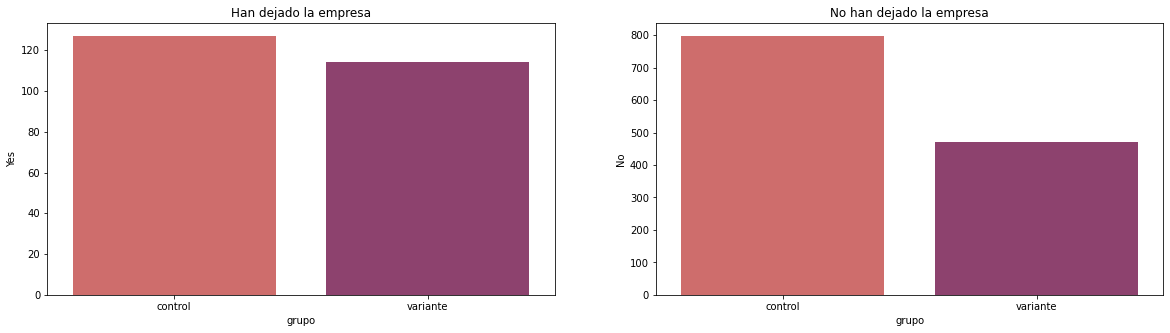

In [25]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.barplot(x="grupo", y="Yes", data=tabla_contingencia_grafica,  palette = "flare", ax = axes[0])
sns.barplot(x="grupo", y="No", data=tabla_contingencia_grafica,  palette = "flare", ax = axes[1])
axes[0].set_title("Han dejado la empresa")
axes[1].set_title("No han dejado la empresa");

In [26]:

# Realizar la prueba de proporciones
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo variante.")
    print("\n ---------- \n")
    
else:
    print("No hay evidencia de una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo variante.")
    print("\n ---------- \n")
    

Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo control y el grupo variante.

 ---------- 



In [27]:
df["monthly_income"].describe().T

count     1510.000000
mean      6201.509272
std       3627.729599
min       1009.000000
25%       3902.500000
50%       5368.000000
75%       7260.200000
max      19999.000000
Name: monthly_income, dtype: float64

In [32]:
df['salario'] = np.where(df['monthly_income']>=5500, 'alto', 'bajo')

In [33]:
tabla_contingencia_grafica2= pd.crosstab(df['salario'], df['attrition']).reset_index()

In [34]:
contingency_table2 = pd.crosstab(df['salario'], df['attrition'])
contingency_table2

attrition,No,Yes
salario,,
alto,635,81
bajo,634,160


In [36]:
#Realizar la prueba de proporciones
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table2)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.")
    print("\n ---------- \n")
    
else:
    print("No hay evidencia de una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.")
    print("\n ---------- \n")
    

Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.

 ---------- 



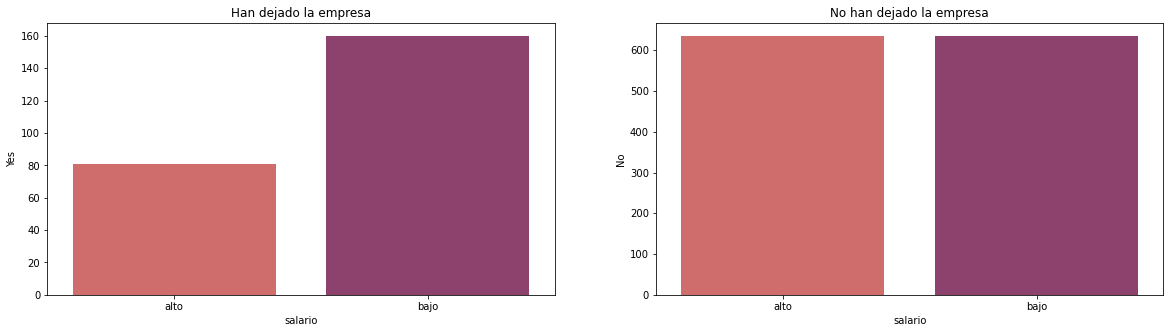

In [37]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.barplot(x="salario", y="Yes", data=tabla_contingencia_grafica,  palette = "flare", ax = axes[0])
sns.barplot(x="salario", y="No", data=tabla_contingencia_grafica,  palette = "flare", ax = axes[1])
axes[0].set_title("Han dejado la empresa")
axes[1].set_title("No han dejado la empresa");

In [38]:
df["distance_from_home"].describe().T

count    1510.000000
mean        9.057351
std         7.565011
min         1.000000
25%         2.000000
50%         7.200000
75%        13.000000
max        29.000000
Name: distance_from_home, dtype: float64

In [45]:
df['distancia_casa'] = np.where(df['distance_from_home']>=8, 'alta', 'baja')

In [46]:
tabla_contingencia_grafica3= pd.crosstab(df['distancia_casa'], df['attrition']).reset_index()

In [47]:
contingency_table3 = pd.crosstab(df['distancia_casa'], df['attrition'])
contingency_table3

attrition,No,Yes
distancia_casa,,
alta,615,129
baja,654,112


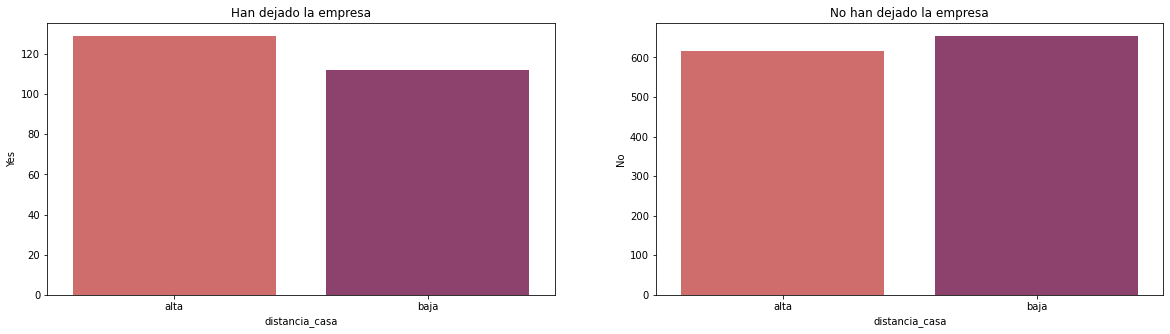

In [50]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.barplot(x='distancia_casa', y="Yes", data=tabla_contingencia_grafica3,  palette = "flare", ax = axes[0])
sns.barplot(x='distancia_casa', y="No", data=tabla_contingencia_grafica3,  palette = "flare", ax = axes[1])
axes[0].set_title("Han dejado la empresa")
axes[1].set_title("No han dejado la empresa");

In [51]:
#Realizar la prueba de proporciones
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table3)
# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.")
    print("\n ---------- \n")
    
else:
    print("No hay evidencia de una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.")
    print("\n ---------- \n")
    

No hay evidencia de una diferencia significativa entre la gente que ha dejado la empresa entre el grupo con salario más alto y el grupo con salario más bajo.

 ---------- 

